In [1]:
# import all the libraies needed
%matplotlib inline
import pandas as pd
import numpy as np
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

init_notebook_mode(connected=True)

# Process the data files

### Load all the data files into dataframes

In [2]:
### Set Path and load all the files
path = r'C:/Users/Albert/Desktop/Healthcare'

#read data files for year 2017
print("reading data for year 2017")
BenCS2017=pd.read_csv(path+'/2017/Benefits_Cost_Sharing_PUF.csv',encoding = "ISO-8859-1",dtype='unicode')
Rate2017=pd.read_csv(path+'/2017/Rate_PUF.csv',encoding = "ISO-8859-1",dtype='unicode')
PlanAtr2017=pd.read_csv(path+'/2017/Plan_Attributes_PUF.csv',encoding = "ISO-8859-1",dtype='unicode')
#Quality2017=pd.read_csv(path+'/2017/Quality_PUF.csv',encoding = "ISO-8859-1",dtype='unicode')

#read data files for year 2016
print("reading data for year 2016")
BenCS2016=pd.read_csv(path+'/2016/Benefits_Cost_Sharing_PUF.csv',encoding = "ISO-8859-1",dtype='unicode')
Rate2016=pd.read_csv(path+'/2016/Rate_PUF.csv',encoding = "ISO-8859-1",dtype='unicode')
PlanAtr2016=pd.read_csv(path+'/2016/Plan_Attributes_PUF.csv',encoding = "ISO-8859-1",dtype='unicode')

#read data files for year 2015
print("reading data for year 2015")
BenCS2015=pd.read_csv(path+'/2015/Benefits_Cost_Sharing_PUF.csv',encoding = "ISO-8859-1",dtype='unicode')
Rate2015=pd.read_csv(path+'/2015/Rate_PUF.csv',encoding = "ISO-8859-1",dtype='unicode')
PlanAtr2015=pd.read_csv(path+'/2015/Plan_Attributes_PUF.csv',encoding = "ISO-8859-1",dtype='unicode')

print ("done!")

reading data for year 2017
reading data for year 2016
reading data for year 2015
done!


### Describe data files and check for missing data

In [3]:
BenCS2017.describe()

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,StandardComponentId,PlanId,BenefitName,CopayInnTier1,CopayInnTier2,...,IsEHB,IsCovered,QuantLimitOnSvc,LimitQty,LimitUnit,Exclusions,Explanation,EHBVarReason,IsExclFromInnMOOP,IsExclFromOonMOOP
count,1324275,1324275,1324275,1324275,1324275,1324275,1324275,1324275,1028713,297860,...,987908,1277817,380238,184171,184171,104480,401071,398311,1117638,1117762
unique,1,39,543,3,109,6646,21371,281,477,159,...,1,2,2,56,62,645,3167,7,2,3
top,2017,TX,33602,HIOS,2017-01-25 02:20:17,87416WI0010023,87416WI0010023-02,Basic Dental Care - Child,Not Applicable,Not Applicable,...,Yes,Covered,No,1,Visit(s) per Year,Coverage for certain agents or medication cate...,Cost share is driven by provider/setting.,Substantially Equal,No,No
freq,1324275,170134,135274,670249,136550,595,85,21371,600986,242111,...,987908,1028713,199455,53736,66419,15896,8879,217929,1104923,949461


In [4]:
Rate2017.describe()

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,...,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,3098756,3098756,3098756,3098756,3098756,3098756,3098756,3098756,3098756,3098756,...,3098756,3098756,649106,3288,3288,3288,3288,3288,3288,3288
unique,1,39,543,3,109,226,4,5,6646,67,...,47,135013,121572,261,339,343,344,344,344,345
top,2017,FL,15560,HIOS,2016-07-01 08:12:23,47-0397286,2017-01-01,2017-12-31,98534FL0240001,Rating Area 1,...,52,0.00,524.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00
freq,3098756,432567,108560,1944266,268126,222104,2016998,2016998,12328,235478,...,67293,157197,78,124,112,112,112,112,112,112


In [5]:
PlanAtr2017.describe()

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,MarketCoverage,DentalOnlyPlan,TIN,StandardComponentId,PlanMarketingName,...,TEHBDedOutOfNetFamilyPerPerson,TEHBDedOutOfNetFamilyPerGroup,TEHBDedCombInnOonIndividual,TEHBDedCombInnOonFamilyPerPerson,TEHBDedCombInnOonFamilyPerGroup,IsHSAEligible,HSAOrHRAEmployerContribution,HSAOrHRAEmployerContributionAmount,URLForSummaryofBenefitsCoverage,PlanBrochure
count,21365,21365,21365,21365,21365,21365,21365,21365,21365,21365,...,12565,12565,12565,12565,12565,18562,2789,183,19737,18211
unique,1,39,543,3,109,2,3,228,6646,3225,...,158,163,139,136,141,2,2,10,10727,4536
top,2017,TX,33602,HIOS,2017-01-25 02:20:17,Individual,No,36-1236610,37833WI0380019,"Blue Cross Blue Shield Solution? 102, a Multi-...",...,per person not applicable,per group not applicable,Not Applicable,per person not applicable,per group not applicable,No,No,$0.00,http://www.christushealthplan.org/summaryofben...,http://www.bcbstx.com/static/tx/pdf/brochure/2...
freq,21365,2584,1998,10664,2006,17121,18556,4016,7,288,...,6811,6550,9896,9928,9893,16413,2606,164,144,1988


In [17]:
#check for missing value in Benefits_Cost_Sharing 2017 data
total = BenCS2017.isnull().sum().sort_values(ascending = True)
percent = (BenCS2017.isnull().sum()/BenCS2017.isnull().count()).sort_values(ascending = True)
missing_BenCS2017  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_BenCS2017

,Total,Percent
BusinessYear,0,0.000000
StateCode,0,0.000000
IssuerId,0,0.000000
SourceName,0,0.000000
ImportDate,0,0.000000
StandardComponentId,0,0.000000
PlanId,0,0.000000
BenefitName,0,0.000000
IsCovered,46458,0.035082
IsExclFromOonMOOP,206513,0.155944


In [16]:
#check for missing value in Rate_PUF 2017 data
total = Rate2017.isnull().sum().sort_values(ascending = True)
percent = (Rate2017.isnull().sum()/Rate2017.isnull().count()).sort_values(ascending = True)
missing_Rate2017  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_Rate2017

,Total,Percent
BusinessYear,0,0.000000
IndividualRate,0,0.000000
Age,0,0.000000
RatingAreaId,0,0.000000
PlanId,0,0.000000
RateExpirationDate,0,0.000000
Tobacco,0,0.000000
FederalTIN,0,0.000000
ImportDate,0,0.000000
SourceName,0,0.000000


In [6]:
#check for missing value in plan_attributes_PUF 2017 data
total = PlanAtr2017.isnull().sum().sort_values(ascending = True)
percent = (PlanAtr2017.isnull().sum()/PlanAtr2017.isnull().count()).sort_values(ascending = True)
missing_PlanAtr2017  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_PlanAtr2017

,Total,Percent
BusinessYear,0,0.000000
QHPNonQHPTypeId,0,0.000000
MultipleInNetworkTiers,0,0.000000
CompositeRatingOffered,0,0.000000
ChildOnlyOffering,0,0.000000
PlanEffictiveDate,0,0.000000
OutOfCountryCoverage,0,0.000000
DesignType,0,0.000000
OutOfServiceAreaCoverage,0,0.000000
BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,0,0.000000


# National level exploration

### Find the number of issurers/plans in each state

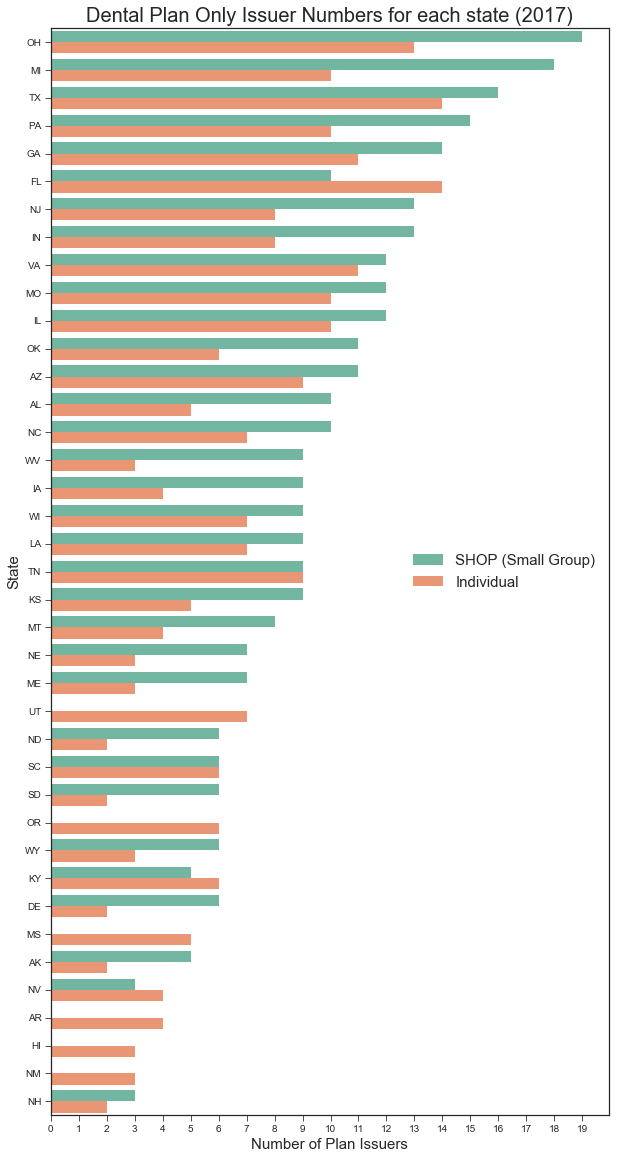

In [45]:
planatr_2017=PlanAtr2017[['StateCode','IssuerId','PlanId','MarketCoverage','DentalOnlyPlan',
                          'PlanType', 'MetalLevel', 'DesignType', 'UniquePlanDesign']]
df_issurer_17=planatr_2017.groupby(['StateCode','MarketCoverage','DentalOnlyPlan'])['IssuerId'].apply(lambda x: x.unique().shape[0]).reset_index().sort_values("IssuerId",ascending=False)
df=df_issurer_17[df_issurer_17['DentalOnlyPlan']=='Yes']

sns.set_style("ticks")
plt.figure(figsize=(10,20))
plt.title('Dental Plan Only Issuer Numbers for each state (2017)',fontsize=20)
ax = sns.barplot(x="IssuerId", y='StateCode', hue="MarketCoverage",data=df,palette='Set2')
plt.legend(loc='right',fontsize=15)
ax.set_xlabel('Number of Plan Issuers',fontsize=15)
ax.set_ylabel('State',fontsize=15)
ax.set_xticks(range(0,20))
plt.show()

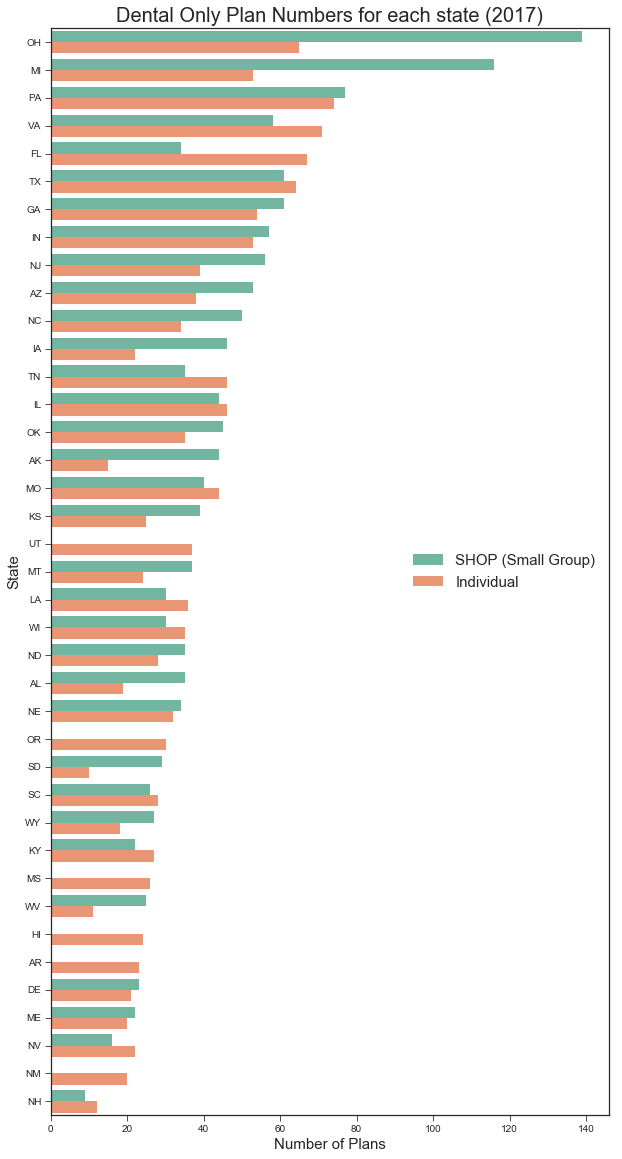

In [61]:
df_plans_17=planatr_2017.groupby(['StateCode','MarketCoverage','DentalOnlyPlan'])['PlanId'].apply(lambda x: x.unique().shape[0]).reset_index().sort_values('PlanId',ascending=False)
df=df_plans_17[df_plans_17['DentalOnlyPlan']=='Yes']

sns.set_style("ticks")
plt.figure(figsize=(10,20))
plt.title('Dental Only Plan Numbers for each state (2017)',fontsize=20)
ax = sns.barplot(x="PlanId", y='StateCode', hue="MarketCoverage",data=df,palette='Set2')
plt.legend(loc='right',fontsize=15)
ax.set_xlabel('Number of Plans',fontsize=15)
ax.set_ylabel('State',fontsize=15)
#ax.set_xticks(range(0,20))
plt.show()

#### Dental plans tend to get issued as a small group rather than individuals nationally. Some States such as Utah, Arkansas, Hawaii, New Mexico only have individual level dental plan issuers.

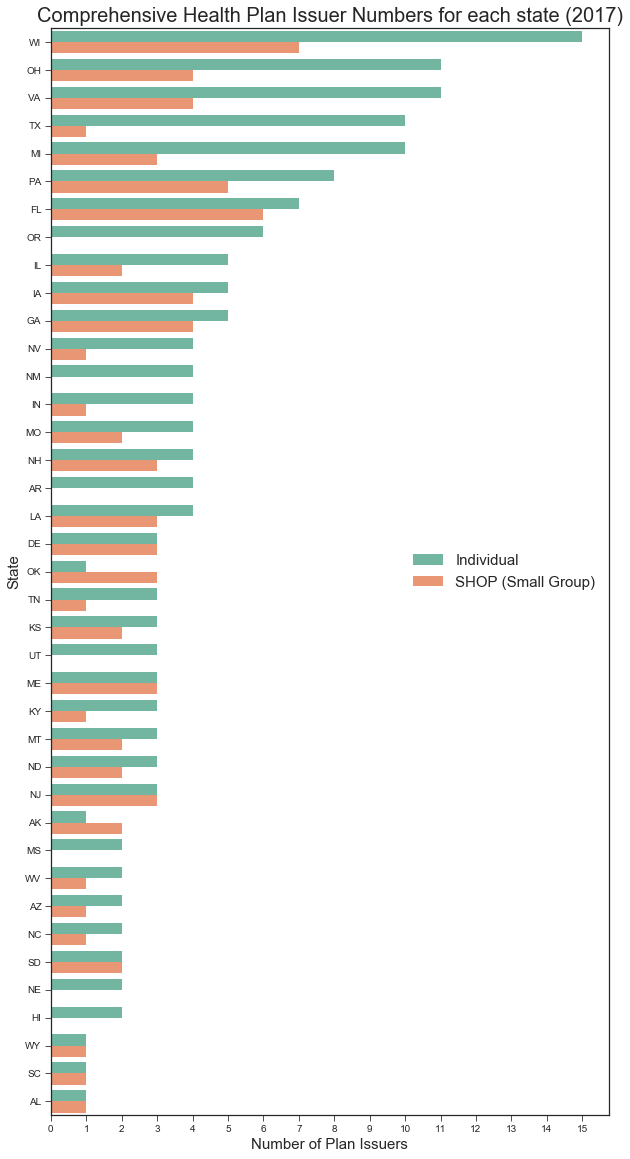

In [59]:
df=df_issurer_17[df_issurer_17['DentalOnlyPlan']=='No']

sns.set_style("ticks")
plt.figure(figsize=(10,20))
plt.title('Comprehensive Health Plan Issuer Numbers for each state (2017)',fontsize=20)
ax = sns.barplot(x="IssuerId", y='StateCode', hue="MarketCoverage",data=df,palette='Set2')
plt.legend(loc='right',fontsize=15)
ax.set_xlabel('Number of Plan Issuers',fontsize=15)
ax.set_ylabel('State',fontsize=15)
ax.set_xticks(range(0,16))
plt.show()

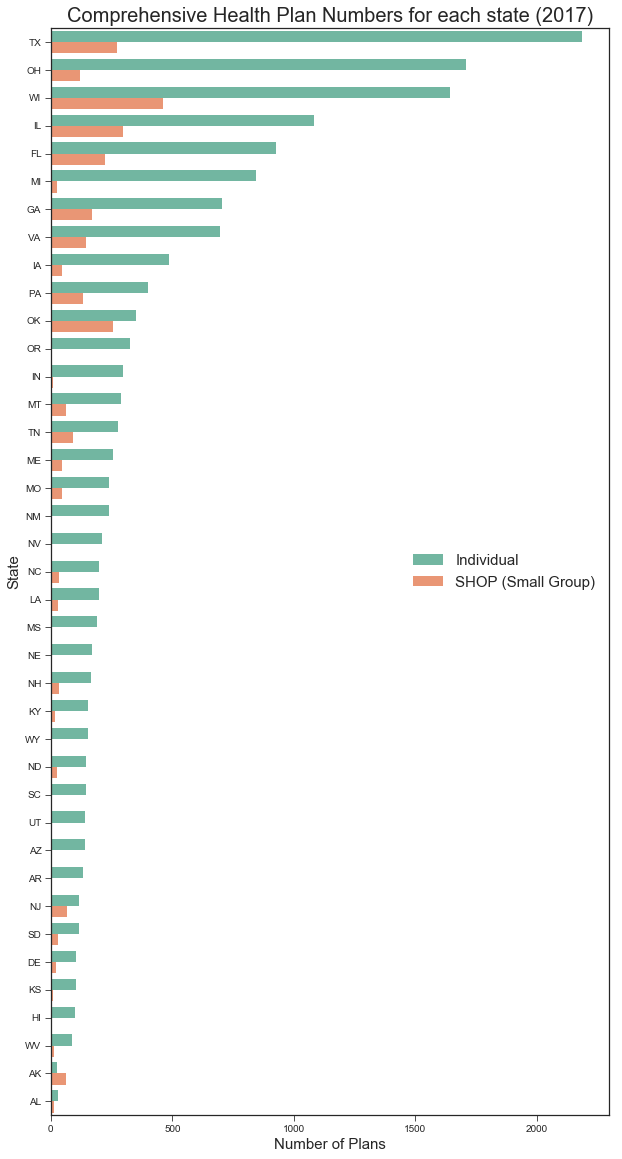

In [63]:
df=df_plans_17[df_plans_17['DentalOnlyPlan']=='No']

sns.set_style("ticks")
plt.figure(figsize=(10,20))
plt.title('Comprehensive Health Plan Numbers for each state (2017)',fontsize=20)
ax = sns.barplot(x="PlanId", y='StateCode', hue="MarketCoverage",data=df,palette='Set2')
plt.legend(loc='right',fontsize=15)
ax.set_xlabel('Number of Plans',fontsize=15)
ax.set_ylabel('State',fontsize=15)
#ax.set_xticks(range(0,16))
plt.show()

#### Health plans tend to target indivuduals. Quite a number of states that do not even issue small group health insurance plans.

In [74]:
# Total number of indivudual plans issued by state
df=df_plans_17[df_plans_17['MarketCoverage']=='Individual']
scl = [[0.0, '#eff3ff'],[0.25, '#bdd7e7'],[0.5, '#6baed6'], 
       [0.75, '#3182bd'],[1, '#08519c']]


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df.StateCode,
        z = df.PlanId,
        locationmode = 'USA-states',
        text = df.StateCode,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of Individual Health Plans (2017)")
        )
       ]

layout = dict(
        title = 'Number of Individual Health Plans in Different States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

#### Direct visualization on the number of health plans in different states. And it's clear that the files doesn't include data from Washington State, California, Idaho, Colorado, New York etc. And more data needs to be collected to carry out a comprehensive national level analysis.

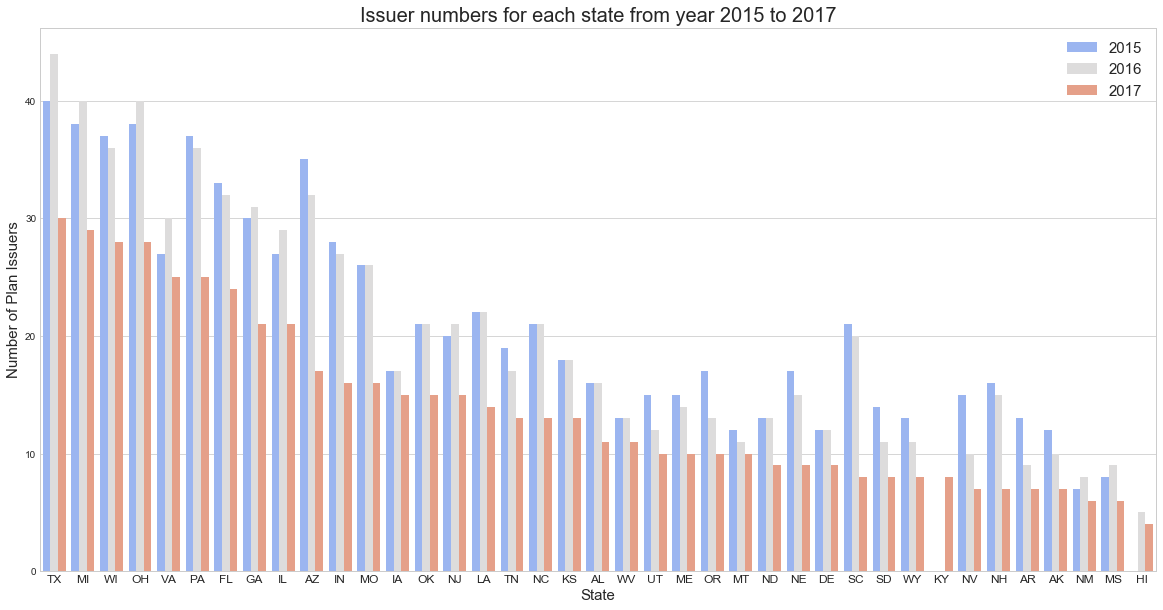

In [8]:
# number of issurers in each state from year 2015-2017
df_2017=BenCS2017[["StateCode","IssuerId","PlanId","BenefitName","IsCovered","IsEHB"]]
df_2016=BenCS2016[["StateCode","IssuerId","PlanId","BenefitName","IsCovered","IsEHB"]]
df_2015=BenCS2015[["StateCode","IssuerId","PlanId","BenefitName","IsCovered","IsEHB"]]

IssuerCt_2017=df_2017.groupby(["StateCode"])['IssuerId'].apply(lambda x: x.unique().shape[0]).reset_index().sort_values("IssuerId",ascending=False)
IssuerCt_2017["year"]=2017
IssuerCt_2016=df_2016.groupby(["StateCode"])['IssuerId'].apply(lambda x: x.unique().shape[0]).reset_index().sort_values("IssuerId",ascending=False)
IssuerCt_2016["year"]=2016
IssuerCt_2015=df_2015.groupby(["StateCode"])['IssuerId'].apply(lambda x: x.unique().shape[0]).reset_index().sort_values("IssuerId",ascending=False)
IssuerCt_2015["year"]=2015

IssuerCt_cbd=pd.concat([IssuerCt_2017,IssuerCt_2016,IssuerCt_2015], ignore_index=True).fillna(0)
#print(IssuerCt_combined)

sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.title('Issuer numbers for each state from year 2015 to 2017',fontsize=20)
ax = sns.barplot(x="StateCode", y='IssuerId', hue="year", data=IssuerCt_cbd,palette='coolwarm')
plt.legend(loc='upper right',fontsize=15)
ax.set_xticklabels(IssuerCt_cbd.StateCode,rotation=0, fontsize=12)
#ax.set_yticklabels(IssuerCt_cbd.IssuerId,rotation=0, fontsize=12)
ax.set_xlabel('State',fontsize=15)
ax.set_ylabel('Number of Plan Issuers',fontsize=15)

plt.show()

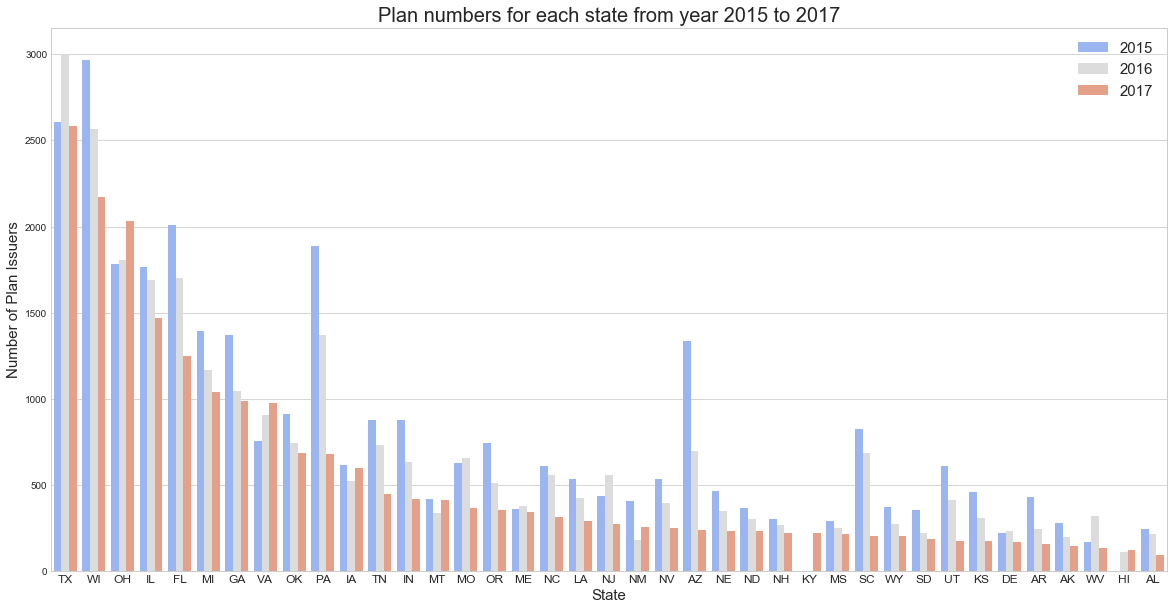

In [13]:
# number of plans in each state from year 2015-2017
PlanCt_2017=df_2017.groupby(["StateCode"])['PlanId'].apply(lambda x: x.unique().shape[0]).reset_index().sort_values("PlanId",ascending=False)
PlanCt_2017["year"]=2017
PlanCt_2016=df_2016.groupby(["StateCode"])['PlanId'].apply(lambda x: x.unique().shape[0]).reset_index().sort_values("PlanId",ascending=False)
PlanCt_2016["year"]=2016
PlanCt_2015=df_2015.groupby(["StateCode"])['PlanId'].apply(lambda x: x.unique().shape[0]).reset_index().sort_values("PlanId",ascending=False)
PlanCt_2015["year"]=2015

PlanCt_cbd=pd.concat([PlanCt_2017,PlanCt_2016,PlanCt_2015], ignore_index=True).fillna(0)
#print(IssuerCt_combined)
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.title('Plan numbers for each state from year 2015 to 2017',fontsize=20)
ax = sns.barplot(x="StateCode", y='PlanId', hue="year", data=PlanCt_cbd,palette='coolwarm')
plt.legend(loc='upper right',fontsize=15)
ax.set_xticklabels(PlanCt_cbd.StateCode,rotation=0, fontsize=12)
#ax.set_yticklabels(IssuerCt_combined.IssuerId,rotation=0, fontsize=12)
ax.set_xlabel('State',fontsize=15)
ax.set_ylabel('Number of Plan Issuers',fontsize=15)
plt.savefig("plan_coverage_bystate_year.png", dpi=600)
plt.show()

#### There seems to be a downward trend for health care plan numbers in almost every state. It could be due to the implementation of ACA, but the trend would be better visualized and analyzed given more historical data.

# State Level Exploration

### Find the distrubution of plans in each state based on how many EHB (essential health benifits) is covered

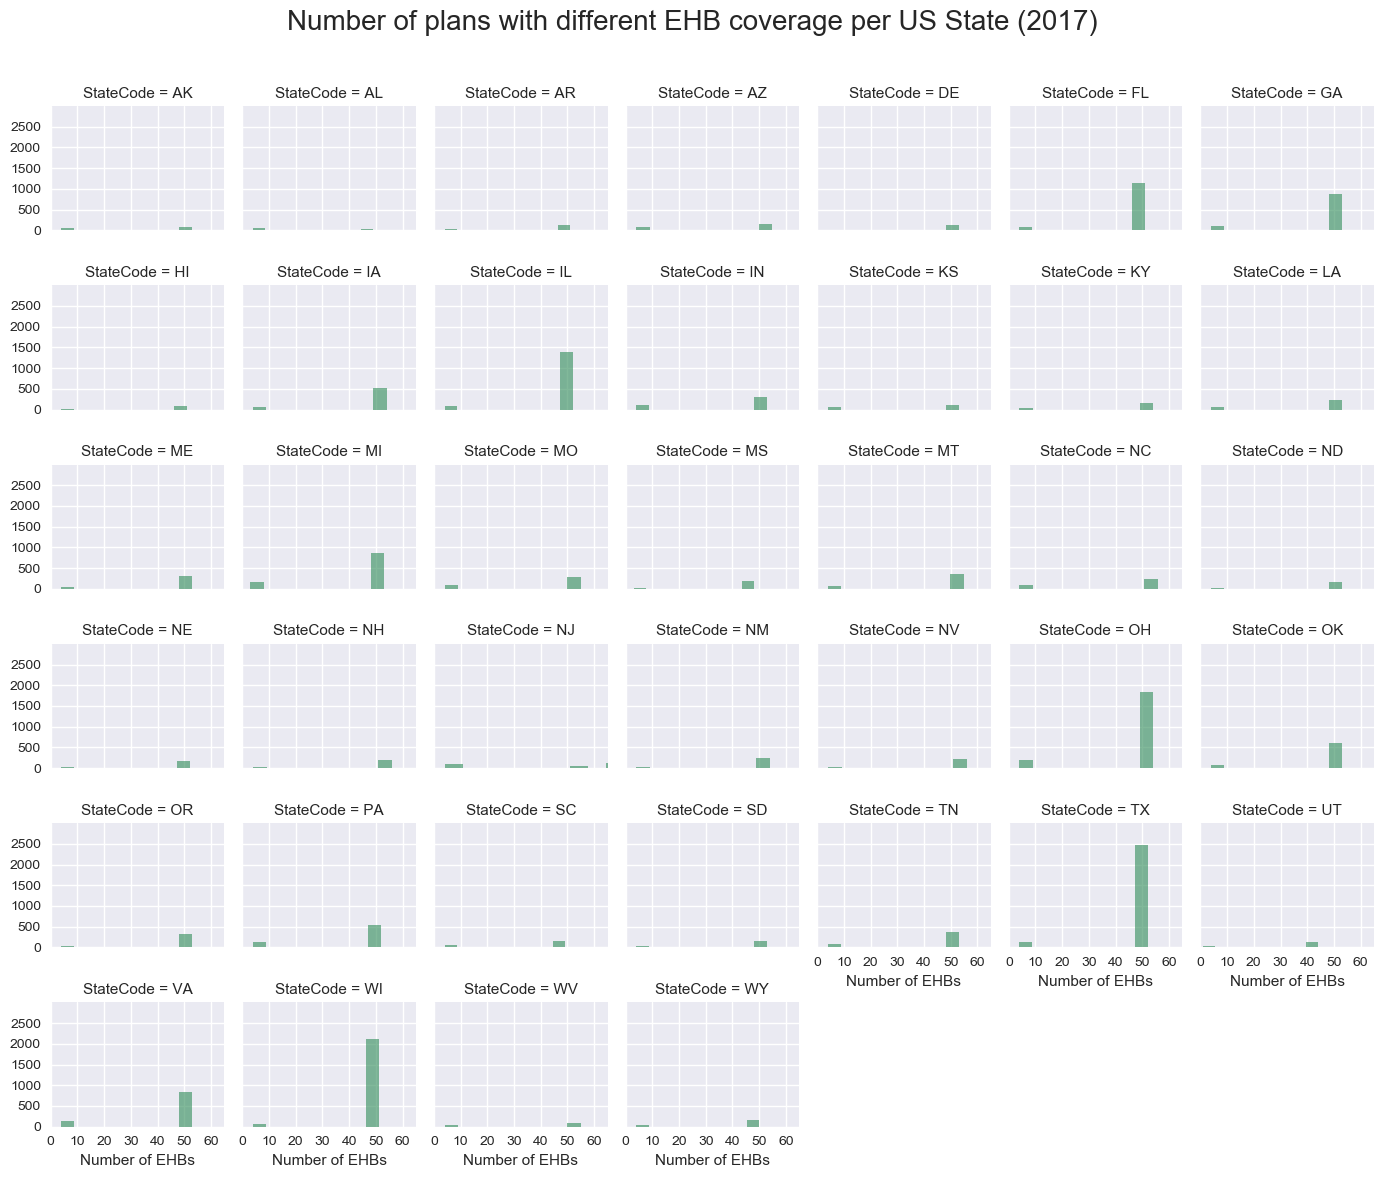

In [375]:
df=df_2017[["StateCode","PlanId","BenefitName","IsCovered","IsEHB"]]
df=df.loc[df["IsEHB"]=="Yes"]
df=df.groupby(["StateCode","PlanId"])["BenefitName"].agg('count').reset_index().set_index("StateCode")
df = df.rename(columns={'BenefitName': 'Number of EHBs'})
sns.set(style="darkgrid")
grid = sns.FacetGrid(df.reset_index(), col="StateCode", hue="StateCode", col_wrap=7, size=2,sharex=True, sharey=True)
grid.map(plt.hist,'Number of EHBs',color="seagreen",alpha=0.6)
grid.set(xticks=np.arange(0,65,10), yticks=np.arange(0,3000,500),
         xlim=(0, 65), ylim=(0, 3000))
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Number of plans with different EHB coverage per US State (2017)',fontsize=20) 
plt.show()

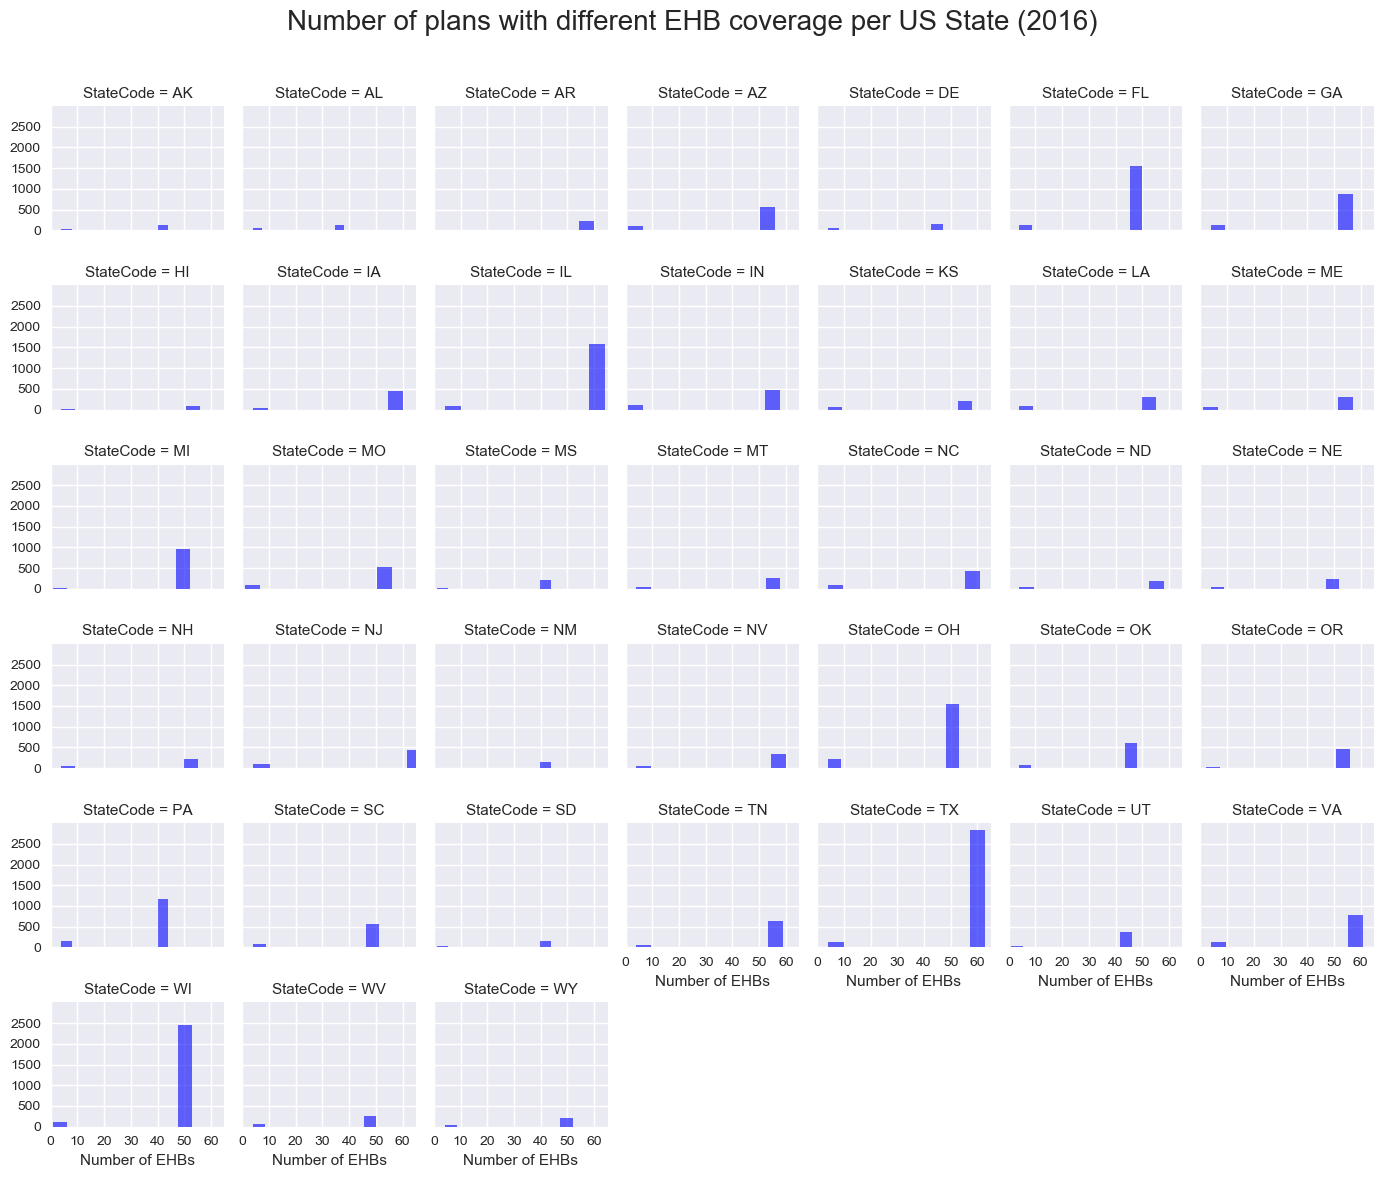

In [377]:
df=df_2016[["StateCode","PlanId","BenefitName","IsCovered","IsEHB"]]
df=df.loc[df["IsEHB"]=="Yes"]
df=df.groupby(["StateCode","PlanId"])["BenefitName"].agg('count').reset_index().set_index("StateCode")
df = df.rename(columns={'BenefitName': 'Number of EHBs'})
sns.set(style="darkgrid")
grid = sns.FacetGrid(df.reset_index(), col="StateCode", hue="StateCode", col_wrap=7, size=2)
grid.map(plt.hist,'Number of EHBs',color="b",alpha=0.6)
grid.set(xticks=np.arange(0,65,10), yticks=np.arange(0,3000,500),
         xlim=(0, 65), ylim=(0, 3000))
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Number of plans with different EHB coverage per US State (2016)',fontsize=20) 
plt.show()

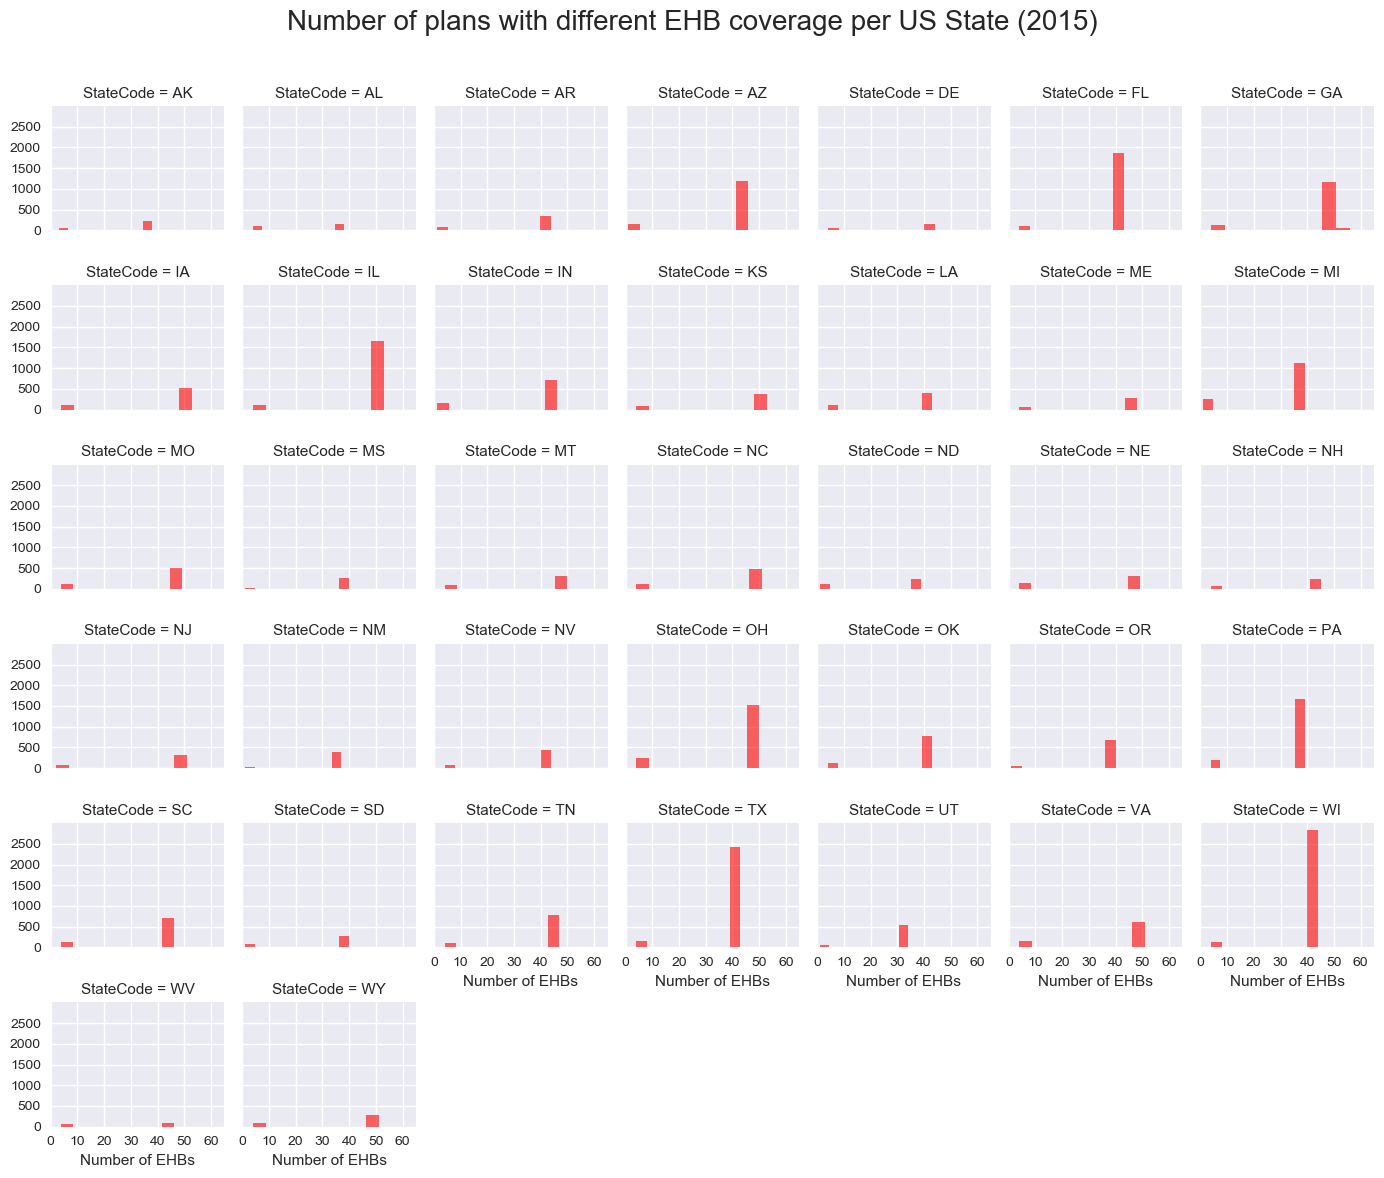

In [378]:
df=df_2015[["StateCode","PlanId","BenefitName","IsCovered","IsEHB"]]
df=df.loc[df["IsEHB"]=="Yes"]
df=df.groupby(["StateCode","PlanId"])["BenefitName"].agg('count').reset_index().set_index("StateCode")
df = df.rename(columns={'BenefitName': 'Number of EHBs'})
sns.set(style="darkgrid")
grid = sns.FacetGrid(df.reset_index(), col="StateCode", hue="StateCode", col_wrap=7, size=2)
grid.map(plt.hist,'Number of EHBs',color="r",alpha=0.6)
grid.set(xticks=np.arange(0,65,10), yticks=np.arange(0,3000,500),
         xlim=(0, 65), ylim=(0, 3000))
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Number of plans with different EHB coverage per US State (2015)',fontsize=20) 
plt.show()

#### It makes more sense to separate dental plans and health plans in this type of analysis since they are bound to cover different number of EHBs (essential health benefits). More interesting topics to cover include the distribution of plans with different medals in each state. Combine the plan attributes data and rate data to help recomend plans.

### When you grow old

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

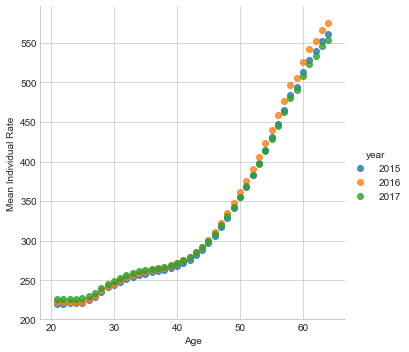

In [14]:
df1=Rate2017[['StateCode','PlanId', 'IssuerId','RatingAreaId', 'Tobacco', 'Age', 'IndividualRate','IndividualTobaccoRate']]
df1['IndividualRate']=pd.to_numeric(df1['IndividualRate'])
df1["Age"]=pd.to_numeric(df1["Age"],errors='coerce')
df1_age=df1.groupby("Age")['IndividualRate'].agg(['mean']).reset_index()
df1_age['year']=2017

df2=Rate2016[['StateCode','PlanId', 'IssuerId','RatingAreaId', 'Tobacco', 'Age', 'IndividualRate','IndividualTobaccoRate']]
df2['IndividualRate']=pd.to_numeric(df2['IndividualRate'])
df2["Age"]=pd.to_numeric(df2["Age"],errors='coerce')
df2_age=df2.groupby("Age")['IndividualRate'].agg(['mean']).reset_index()
df2_age['year']=2016

df3=Rate2015[['StateCode','PlanId', 'IssuerId','RatingAreaId', 'Tobacco', 'Age', 'IndividualRate','IndividualTobaccoRate']]
df3['IndividualRate']=pd.to_numeric(df3['IndividualRate'])
df3["Age"]=pd.to_numeric(df3["Age"],errors='coerce')
df3_age=df3.groupby("Age")['IndividualRate'].agg(['mean']).reset_index()
df3_age['year']=2015

age_cbd=pd.concat([df1_age,df2_age,df3_age], ignore_index=True)
age_cbd=age_cbd.set_index("Age").rename(columns={'mean': 'Mean Individual Rate'}).reset_index()

sns.lmplot(x='Age', y='Mean Individual Rate',data=age_cbd,hue='year',fit_reg=False)

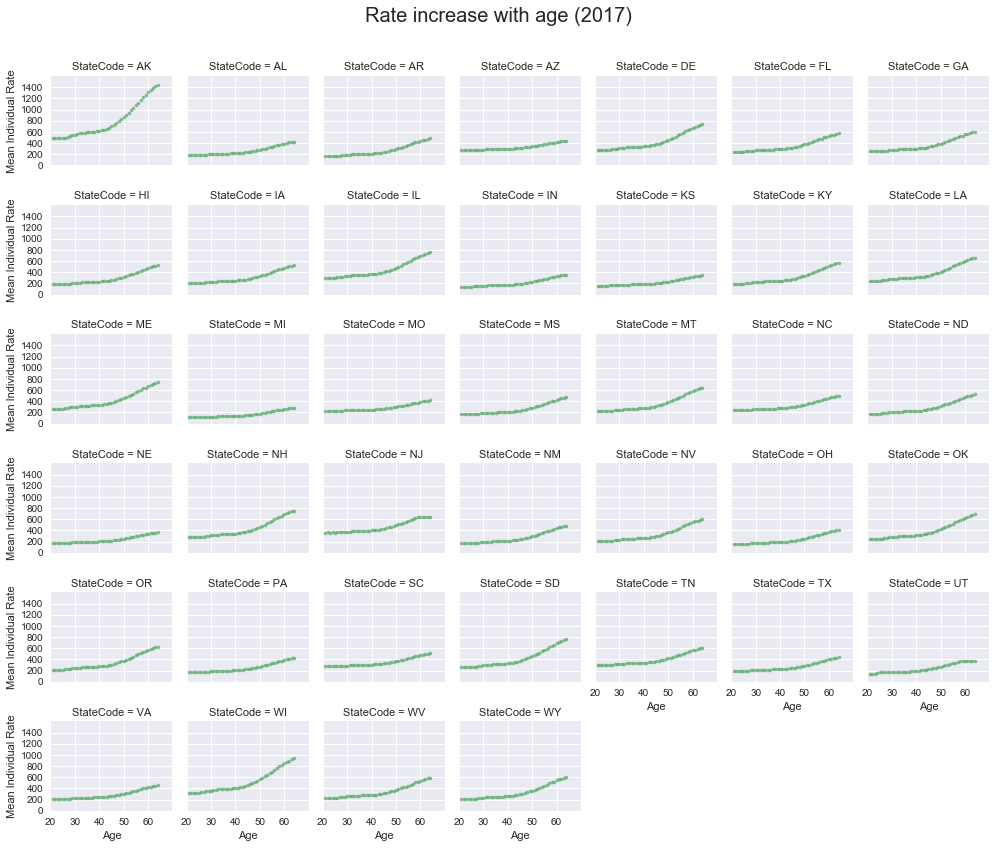

In [16]:
df_age2017=df1.groupby(['StateCode','Age'])['IndividualRate'].agg(['mean']).reset_index()
df_age2017=df_age2017.set_index('StateCode').rename(columns={'mean': 'Mean Individual Rate'}).reset_index()

sns.set(style="darkgrid")
grid = sns.FacetGrid(data=df_age2017, col='StateCode', hue='StateCode',col_wrap=7, size=2)
grid.map(plt.scatter, "Age", "Mean Individual Rate", s=10, color="C1",alpha=0.7)
grid.set(xticks=np.arange(20,70,10), yticks=np.arange(0,1600,200),
         xlim=(20, 70), ylim=(0, 1600))
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Rate increase with age (2017)',fontsize=20)
plt.savefig("rate_increase_age.png", dpi=600)
plt.show()

### Where can you smoke without a worry?

C:\Users\Albert\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



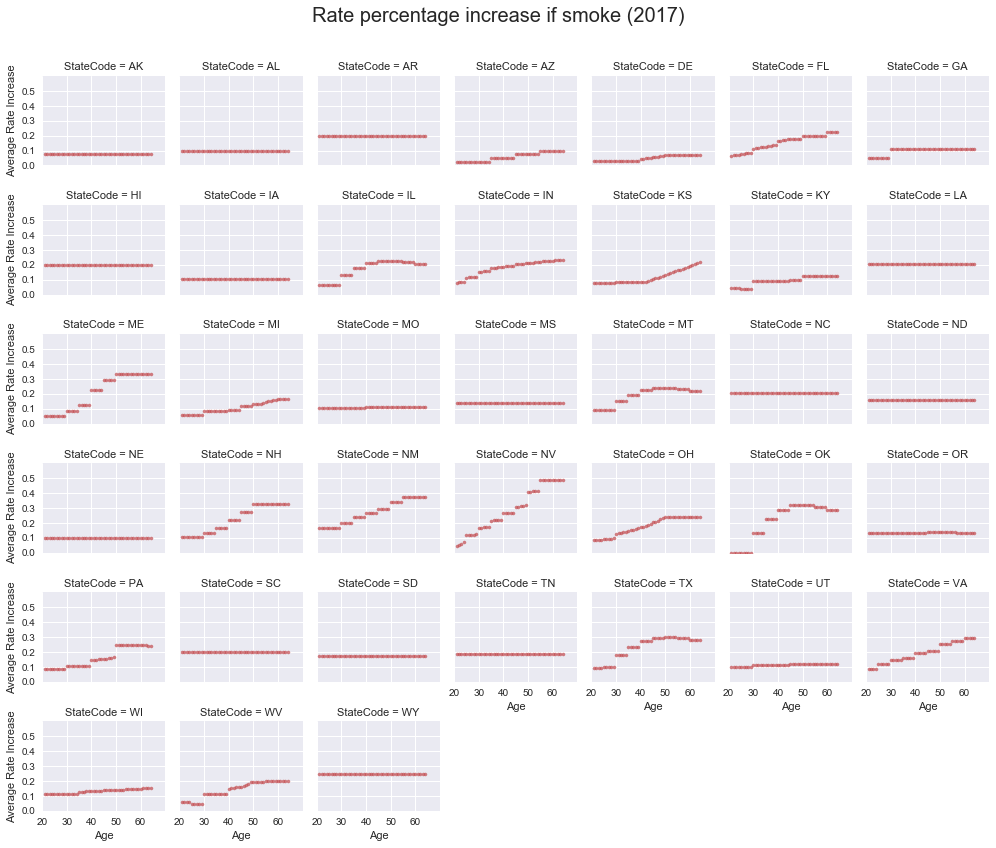

In [17]:
# whether you smoke matters somewhere
df=df1.loc[df1['Tobacco']=='Tobacco User/Non-Tobacco User']
df.loc[:,['IndividualTobaccoRate']]=df['IndividualTobaccoRate'].apply(pd.to_numeric)
df["Percentage Difference"]=(df['IndividualTobaccoRate']-df['IndividualRate'])/df['IndividualRate']
df=df.groupby(['StateCode','Age'])['Percentage Difference'].agg(['mean']).reset_index()

df=df.set_index('StateCode').rename(columns={'mean': 'Average Rate Increase'}).reset_index()

sns.set(style="darkgrid")
grid = sns.FacetGrid(data=df, col='StateCode', hue='StateCode',col_wrap=7, size=2)
grid.map(plt.scatter, "Age", "Average Rate Increase", s=10, color="C2",alpha=0.7)
grid.set(xticks=np.arange(20,70,10), yticks=np.arange(0,0.6,0.1),
         xlim=(20, 70), ylim=(0, 0.6))
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Rate percentage increase if smoke (2017)',fontsize=20)
plt.savefig("rate_change_smoking.png", dpi=600)
plt.show()

### How many dependents as an individual?

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

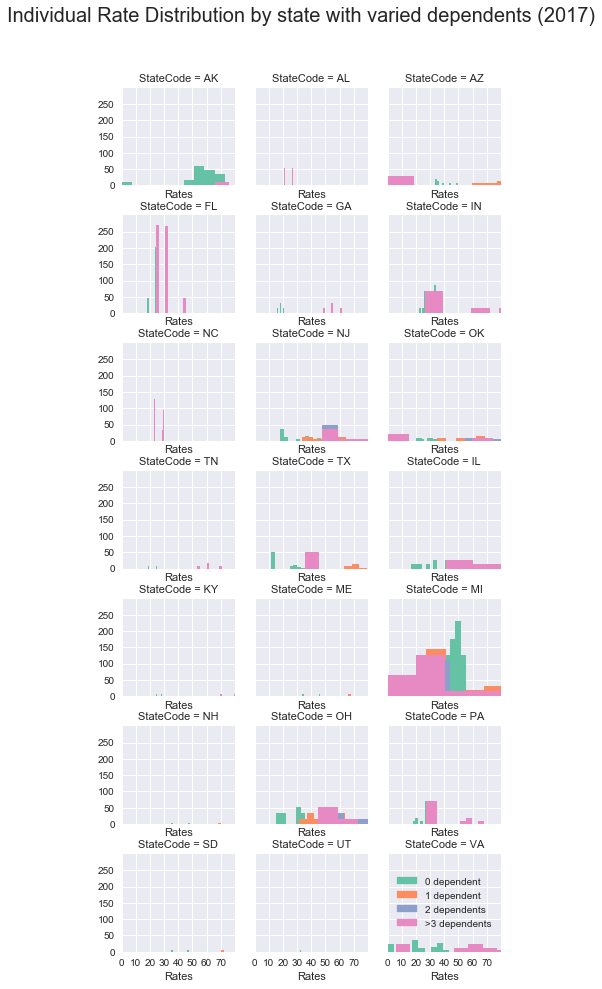

In [18]:
df4=Rate2017[['StateCode','PlanId', 'IssuerId','Age','IndividualRate','PrimarySubscriberAndOneDependent','PrimarySubscriberAndTwoDependents',
             'PrimarySubscriberAndThreeOrMoreDependents', 'Couple','CoupleAndOneDependent','CoupleAndTwoDependents',
             'CoupleAndThreeOrMoreDependents']]
df4=df4.loc[df4['Age']=='Family Option']
df=df4[['StateCode','IndividualRate','PrimarySubscriberAndOneDependent',
       'PrimarySubscriberAndTwoDependents','PrimarySubscriberAndThreeOrMoreDependents']]
df['IndividualRate']=pd.to_numeric(df['IndividualRate'])
df['OneDependent']=pd.to_numeric(df['PrimarySubscriberAndOneDependent'])
df['TwoDependents']=pd.to_numeric(df['PrimarySubscriberAndTwoDependents'])
df['ThreeOrMoreDependents']=pd.to_numeric(df['PrimarySubscriberAndThreeOrMoreDependents'])

sns.set(style="darkgrid")
colors=sns.color_palette("Set2", 10)
grid = sns.FacetGrid(df, col="StateCode", hue="StateCode",col_wrap=3, size=2)
g=grid.map(plt.hist,'IndividualRate',color=colors[0])
g=grid.map(plt.hist,'OneDependent',color=colors[1])
g=grid.map(plt.hist,'TwoDependents',color=colors[2])
g=grid.map(plt.hist,'ThreeOrMoreDependents',color=colors[3])

# There is no labels, need to define the labels
legend_labels  = ['0 dependent', '1 dependent', '2 dependents', '>3 dependents']

# Create the legend patches
legend_patches = [mpl.patches.Patch(color=C, label=L) for C, L in zip(colors[:4],legend_labels)]

# Plot the legend
plt.legend(handles=legend_patches,loc='center left')

grid.set(xlabel="Rates",xticks=np.arange(0,80,10), yticks=np.arange(0,300,50),
         xlim=(0, 80), ylim=(0, 300))
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Individual Rate Distribution by state with varied dependents (2017)',fontsize=20) 

plt.savefig("Rate_with_varied_dependents_ind.png", dpi=600)
plt.show()


### How many dependents as a couple?

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

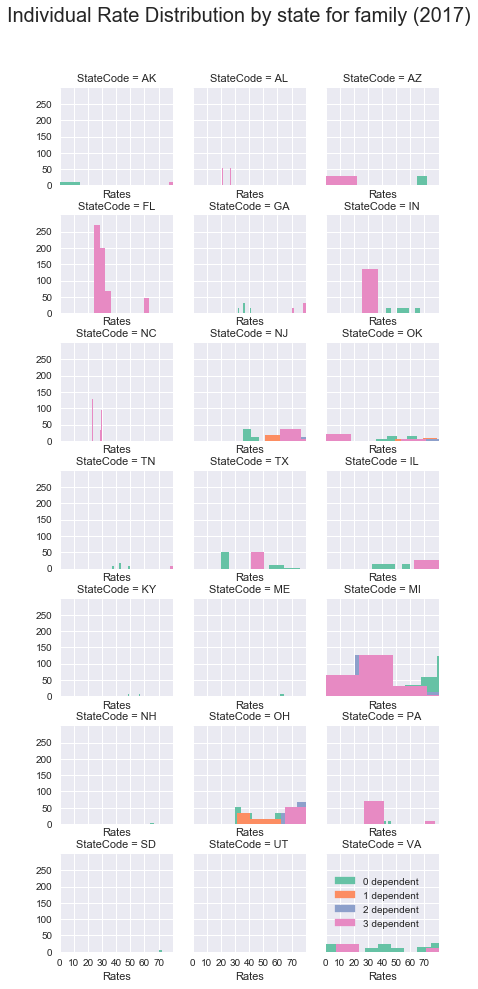

In [146]:
# Which state is the best to have kids (individual with dependent)
df=df4[['StateCode','Couple','CoupleAndOneDependent','CoupleAndTwoDependents','CoupleAndThreeOrMoreDependents']]
df['Couple']=pd.to_numeric(df['Couple'])
df['OneDependent']=pd.to_numeric(df['CoupleAndOneDependent'])
df['TwoDependents']=pd.to_numeric(df['CoupleAndTwoDependents'])
df['ThreeOrMoreDependents']=pd.to_numeric(df['CoupleAndThreeOrMoreDependents'])

sns.set(style="darkgrid")
colors=sns.color_palette("Set2", 10)
grid = sns.FacetGrid(df, col="StateCode", hue="StateCode",col_wrap=3, size=2)
g=grid.map(plt.hist,'Couple',color=colors[0])
g=grid.map(plt.hist,'OneDependent',color=colors[1])
g=grid.map(plt.hist,'TwoDependents',color=colors[2])
g=grid.map(plt.hist,'ThreeOrMoreDependents',color=colors[3])

# There is no labels, need to define the labels
legend_labels  = ['0 dependent', '1 dependent', '2 dependent', '3 dependent', '4 dependent']

# Create the legend patches
legend_patches = [mpl.patches.Patch(color=C, label=L) for C, L in zip(colors[:4],legend_labels)]

# Plot the legend
plt.legend(handles=legend_patches,loc='center left')

grid.set(xlabel="Rates",xticks=np.arange(0,80,10), yticks=np.arange(0,300,50),
         xlim=(0, 80), ylim=(0, 300))
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Couple Rate Distribution by state with varied dependents (2017)',fontsize=20) 
plt.show()
